In [21]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
# We use PIL lib to load image from a image path to be consistent with Tensorflow tutorial. You can use Skimage instead like previous weeks.
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

cifar100 = tf.keras.datasets.cifar100 
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

batch_size = 32
img_height = 32
img_width = 32

unique_labels = np.unique(train_labels)
print("Unique labels:", unique_labels)
num_classes = len(unique_labels)

batch_size = 32
img_height = 32
img_width = 32

data_augmentation = Sequential(
  [ 
    layers.RandomFlip("horizontal", 
                      input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
);

from tensorflow.keras import layers, Model

def residual_block(x, filters, kernel_size, strides=(1, 1), padding='same'):
    # Shortcut branch
    shortcut = layers.Conv2D(filters, kernel_size, strides=strides, padding=padding)(x)
    shortcut = layers.BatchNormalization()(shortcut)

    # Main branch
    x = layers.Conv2D(filters, kernel_size, strides=strides, padding=padding)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(filters, kernel_size, padding=padding)(x)
    x = layers.BatchNormalization()(x)

    # Add shortcut and main branch
    x = layers.Add()([x, shortcut])
    x = layers.ReLU()(x)
    x = layers.BatchNormalization()(x)
    return x

# Define the model
inputs = layers.Input(shape=(img_height, img_width, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(16, (7, 7), strides=(1, 1), padding='valid', activation='relu')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)

# Add residual blocks
x = residual_block(x, filters=50, kernel_size=(3, 3))
x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)

x = layers.Dropout(0.2)(x) # 0 -> 1 -> dropout_rate=0.5

x = layers.Flatten()(x)
x = layers.Dense(200, activation='relu')(x)
outputs = layers.Dense(num_classes)(x)

model = Model(inputs, outputs)
model.summary()

# Compile the model


Unique labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


Model: "functional_32"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_21      │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_10        │ (None, 32, 32, 3) │          0 │ input_layer_21[0… │
│ (Rescaling)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_68 (Conv2D)  │ (None, 26, 26,    │      2,368 │ rescaling_10[0][… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_28    │ (None, 13, 13,    │          0 │ conv2d_68[0][0]   │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_70 (Conv2D)  │ (None, 13, 13,    │      7,250 │ max_pooling2d_28… │
│                     │ 50)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 13, 13,    │        200 │ conv2d_70[0][0]   │
│ (BatchNormalizatio… │ 50)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_40 (ReLU)     │ (None, 13, 13,    │          0 │ batch_normalizat… │
│                     │ 50)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_71 (Conv2D)  │ (None, 13, 13,    │     22,550 │ re_lu_40[0][0]    │
│                     │ 50)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_69 (Conv2D)  │ (None, 13, 13,    │      7,250 │ max_pooling2d_28… │
│                     │ 50)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 13, 13,    │        200 │ conv2d_71[0][0]   │
│ (BatchNormalizatio… │ 50)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 13, 13,    │        200 │ conv2d_69[0][0]   │
│ (BatchNormalizatio… │ 50)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_20 (Add)        │ (None, 13, 13,    │          0 │ batch_normalizat… │
│                     │ 50)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_41 (ReLU)     │ (None, 13, 13,    │          0 │ add_20[0][0]      │
│                     │ 50)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 13, 13,    │        200 │ re_lu_41[0][0]    │
│ (BatchNormalizatio… │ 50)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_29    │ (None, 6, 6, 50)  │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 6, 6, 50)  │          0 │ max_pooling2d_29… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_10          │ (None, 1800)      │          0 │ dropout_9[0][0]   │
│ (Flatten)           │                   │            │                 

 Total params: 420,518 (1.60 MB)

 Trainable params: 420,118 (1.60 MB)

 Non-trainable params: 400 (1.56 KB)

Epoch 1/5
1563/1563 - 80s - 51ms/step - accuracy: 0.4725 - loss: 1.9963 - val_accuracy: 0.3510 - val_loss: 2.6522
Epoch 2/5
1563/1563 - 87s - 55ms/step - accuracy: 0.5049 - loss: 1.8285 - val_accuracy: 0.3494 - val_loss: 2.6962
Epoch 3/5
1563/1563 - 90s - 58ms/step - accuracy: 0.5364 - loss: 1.6903 - val_accuracy: 0.3721 - val_loss: 2.6429
Epoch 4/5
1563/1563 - 70s - 45ms/step - accuracy: 0.5658 - loss: 1.5639 - val_accuracy: 0.3088 - val_loss: 3.1365
Epoch 5/5
1563/1563 - 86s - 55ms/step - accuracy: 0.5944 - loss: 1.4489 - val_accuracy: 0.3636 - val_loss: 2.8223
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.3649 - loss: 2.8255
Test Accuracy: 0.3635999858379364


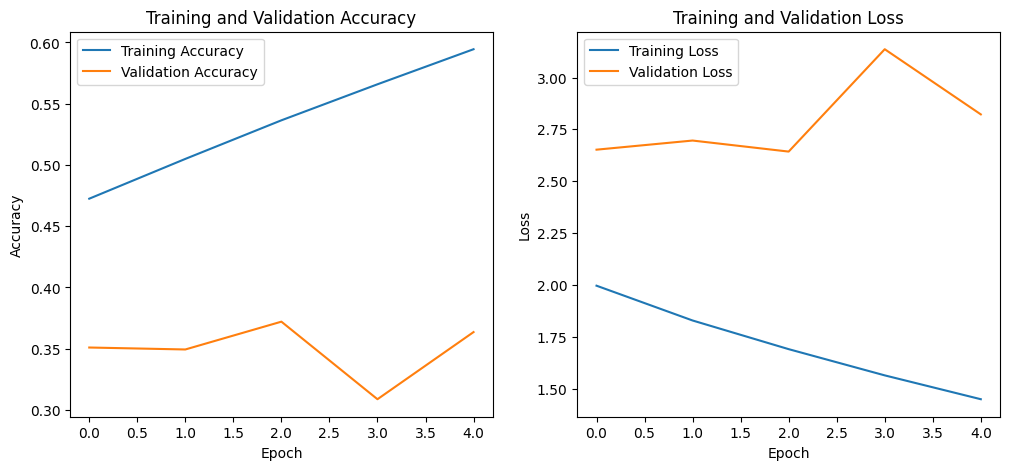

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
epochs = 5
history_bn_model_filter = model.fit(
  train_images,train_labels,
  validation_data=(test_images, test_labels),
  epochs=epochs,
  verbose=2, # 0 = silent, 1 = progress bar, 2 = one line per epoch
)



# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_accuracy)

#accuracy is 0.59
model.save_weights('checkpoint_task3.weights.h5')
# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_bn_model_filter.history['accuracy'], label='Training Accuracy')
plt.plot(history_bn_model_filter.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_bn_model_filter.history['loss'], label='Training Loss')
plt.plot(history_bn_model_filter.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()